# Solución de Cliff con Q-learning 

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

### Un grid de tres renglones con cuatro columnas. En cada celda se puede tomar una de cuatro acciones: norte, sur, este, oeste.

In [2]:
nrows = 3
ncols = 12
nact = 4

### Parámetros de entrenamiento. Se define el número de episodios, epsilon para combinar exploración y explotación, alfa es el learning rate y gamma se usa en la función de Bellman.

In [3]:
nepisodes = 100000
epsilon = 0.1 # epsilon-greedy
alpha = 0.1   # learning rate
gamma = 0.95  # discount factor

### Las diferentes rewards del environment. Caer en el desfiladero otorga el peor penalti.

In [4]:
reward_normal = -1
reward_cliff = -100
reward_destination = -1

### Creación de los Q values 

In [6]:
Q = np.zeros((nrows,ncols,nact),dtype=np.float32)

### Función para ir al inicio del grid

In [7]:
def go_to_start():
    # start coordinates 
    y = nrows
    x = 0
    return x, y

### Generador aleatorio de acciones. Sólo hay cuatro posibles acciones.

In [8]:
def random_action():
    # a = 0 : top/north
    # a = 1 : right/east
    # a = 2 : bottom/south
    # a = 3 : left/west
    a = np.random.randint(nact)
    return a

### Función que calcula el nuevo estado dados el estado actual y la acción tomada por el agente. El origen, 0, 0, se encuentra en la parte superior izquierda, mientras que la parte inferior derecha marca el límite del grid, ncols-1 y nrows-1.

In [9]:
def move(x,y,a):
    # state = 0: OK
    # state = 1: reached destination
    # state = 2: fell into cliff
    state = 0 

    if (x == 0 and y == nrows and a == 0):
        # start location
        x1 = x
        y1 = y - 1 
        return x1, y1, state  
    elif (x == ncols-1 and y == nrows-1 and a == 2):
        # reached destination
        x1 = x
        y1 = y + 1
        state = 1
        return x1, y1, state
    else: 
        if (a == 0):
            x1 = x
            y1 = y - 1
        elif (a == 1):
            x1 = x + 1
            y1 = y
        elif (a == 2):
            x1 = x
            y1 = y + 1
        elif (a == 3):
            x1 = x - 1 
            y1 = y
        if (x1 < 0):
            x1 = 0
        if (x1 > ncols-1):
            x1 = ncols-1
        if (y1 < 0):
            y1 = 0
        if (y1 > nrows-1):
            state = 2
        return x1, y1, state    

### La función exploit regresa la mejor acción para maximizar el reward (greedy action).

In [10]:
def exploit(x,y,Q):
    # start location, go north
    if (x == 0 and y == nrows):
        a = 0
        return a 
    # destination location, go south
    if (x == ncols-1 and y == nrows-1):
        a = 2
        return a
    if (x == ncols-1 and y == nrows):
        print("exploit at destination not possible ")
        # run-time terminated
        sys.exit()
    # interior location
    if (x < 0 or x > ncols-1 or y < 0 or y > nrows-1):
        print("error ", x, y)
        sys.exit()
    a = np.argmax(Q[y,x,:]) 
    return a

### La ecuación de Bellman actualiza la Q table con Q values.

![bellman](https://drive.google.com/uc?export=view&id=1V4QTcaZ9jNoeTu0gostwmG9HATQ0kNV3)


In [11]:
def bellman(x,y,a,reward,Qs1a1,Q):
    if (y == nrows and x == 0):
        # at start location; no Bellman update possible
        return Q
    if (y == nrows and x == ncols-1):
        # at destination location; no Bellman update possible
        return Q
    Q[y,x,a] = Q[y,x,a] + alpha*(reward + gamma*Qs1a1 - Q[y,x,a])
    return Q

### Esta función regresa la acción con el mayor Q value dado el estado indicado.

In [12]:
def max_Q(x,y,Q):
    a = np.argmax(Q[y,x,:]) 
    return Q[y,x,a]

### Función que combina las estrategias de explore y exploit usando el valor indicado de Epsilon. Si es explore, la acción es aleatoria y, si es exploit, se invoca la función exploit para maximizar el reward.

In [13]:
def explore_exploit(x,y,Q):
    # if we end up at the start location, then exploit
    if (x == 0 and y == nrows):
        a = 0
        return a
    # random r compared to epsilon defines if it is explore or exploit 
    r = np.random.uniform()
    if (r < epsilon):
        # explore
        a = random_action()
    else:
        # exploit
        a = exploit(x,y,Q) 
    return a

### Entrenamiento

In [14]:
for n in range(nepisodes+1):
    if (n % 1000 == 0): 
        print("episode #: ", n)
    x, y = go_to_start()

    while(True):
        a = explore_exploit(x,y,Q)
        x1, y1, state = move(x,y,a)
        if (state == 1):
            reward = reward_destination
            Qs1a1 = 0.0
            Q = bellman(x,y,a,reward,Qs1a1,Q)
            break 
        elif (state == 2):         
            reward = reward_cliff
            Qs1a1 = 0.0
            Q = bellman(x,y,a,reward,Qs1a1,Q)
            break
        elif (state == 0):     
            reward = reward_normal
            # Q-learning
            Qs1a1 = max_Q(x1,y1,Q)
     
            Q = bellman(x,y,a,reward,Qs1a1,Q)
            x = x1
            y = y1

episode #:  0
episode #:  1000
episode #:  2000
episode #:  3000
episode #:  4000
episode #:  5000
episode #:  6000
episode #:  7000
episode #:  8000
episode #:  9000
episode #:  10000
episode #:  11000
episode #:  12000
episode #:  13000
episode #:  14000
episode #:  15000
episode #:  16000
episode #:  17000
episode #:  18000
episode #:  19000
episode #:  20000
episode #:  21000
episode #:  22000
episode #:  23000
episode #:  24000
episode #:  25000
episode #:  26000
episode #:  27000
episode #:  28000
episode #:  29000
episode #:  30000
episode #:  31000
episode #:  32000
episode #:  33000
episode #:  34000
episode #:  35000
episode #:  36000
episode #:  37000
episode #:  38000
episode #:  39000
episode #:  40000
episode #:  41000
episode #:  42000
episode #:  43000
episode #:  44000
episode #:  45000
episode #:  46000
episode #:  47000
episode #:  48000
episode #:  49000
episode #:  50000
episode #:  51000
episode #:  52000
episode #:  53000
episode #:  54000
episode #:  55000
episo

### Graficación de los resultados del entrenamiento

In [15]:
for i in range(nact):
    plt.subplot(nact,1,i+1)
    plt.imshow(Q[:,:,i])
    plt.axis('off')
    plt.colorbar()
    if (i == 0):
        plt.title('Q-north')
    elif (i == 1):
        plt.title('Q-east')
    elif (i == 2):
        plt.title('Q-south')
    elif (i == 3):
        plt.title('Q-west')    
    plt.savefig('Q_qlearning.png')
    plt.clf()
    plt.close()

### Path Planning

0 3 0
0 2 1
1 2 1
2 2 1
3 2 1
4 2 1
5 2 1
6 2 1
7 2 1
8 2 1
9 2 1
10 2 1
11 2 2
breaking  1


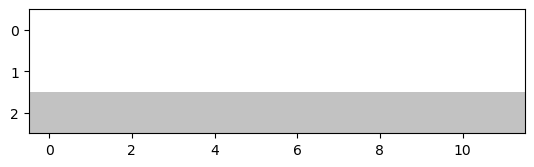

In [17]:
path = np.zeros((nrows,ncols,nact),dtype=np.float32)

x, y = go_to_start()
while(True):
    a = exploit(x,y,Q) 
    print(x,y,a)
    x1, y1, state = move(x,y,a)
    if (state == 1 or state == 2):
        print("breaking ", state)
        break 
    elif (state == 0):     
        x = x1
        y = y1
        if (x >= 0 and x <= ncols-1 and y >= 0 and y <= nrows-1):
            path[y,x] = 100.0

path = np.array(path).astype(np.uint8)

plt.imshow(path)
plt.savefig('path_sarsa.png')

#print("done")